##**Marketing Campaign Analytics: Extracting Actionable Insights with Python**





In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os


warnings.simplefilter(action="ignore", category=FutureWarning)

# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

# Configure Seaborn styles for better visualizations
sns.set_context('notebook')  # Sets the context for the plots
sns.set_style('whitegrid')   # Sets the style for the background of the plots

data_path = '/content/ifood_df.csv'

df = pd.read_csv(data_path)
print(f"Dataset loaded successfully! Shape: {df.shape}")

Dataset loaded successfully! Shape: (2205, 39)


In [24]:
   df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0


In [25]:
# Check data types
print("Column Data Types:")
print(df.dtypes)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Column Data Types:
Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow        

In [26]:
# Convert 'Income' column from float to int
df['Income'] = df['Income'].astype(int)

# Confirm the conversion
print(df.dtypes)


Income                  int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
Age                     int64
Customer_Days           int64
marital_Divorced        int64
marital_Married         int64
marital_Single          int64
marital_Together        int64
marital_Widow           int64
education_2n Cycle      int64
education_Basic         int64
education_

In [27]:
# Find exact duplicates
duplicate_rows = df[df.duplicated()]
print(f"Exact duplicate rows: {duplicate_rows.shape[0]}")



Exact duplicate rows: 184


In [28]:
#Drop duplicates
df.drop_duplicates(inplace=True)

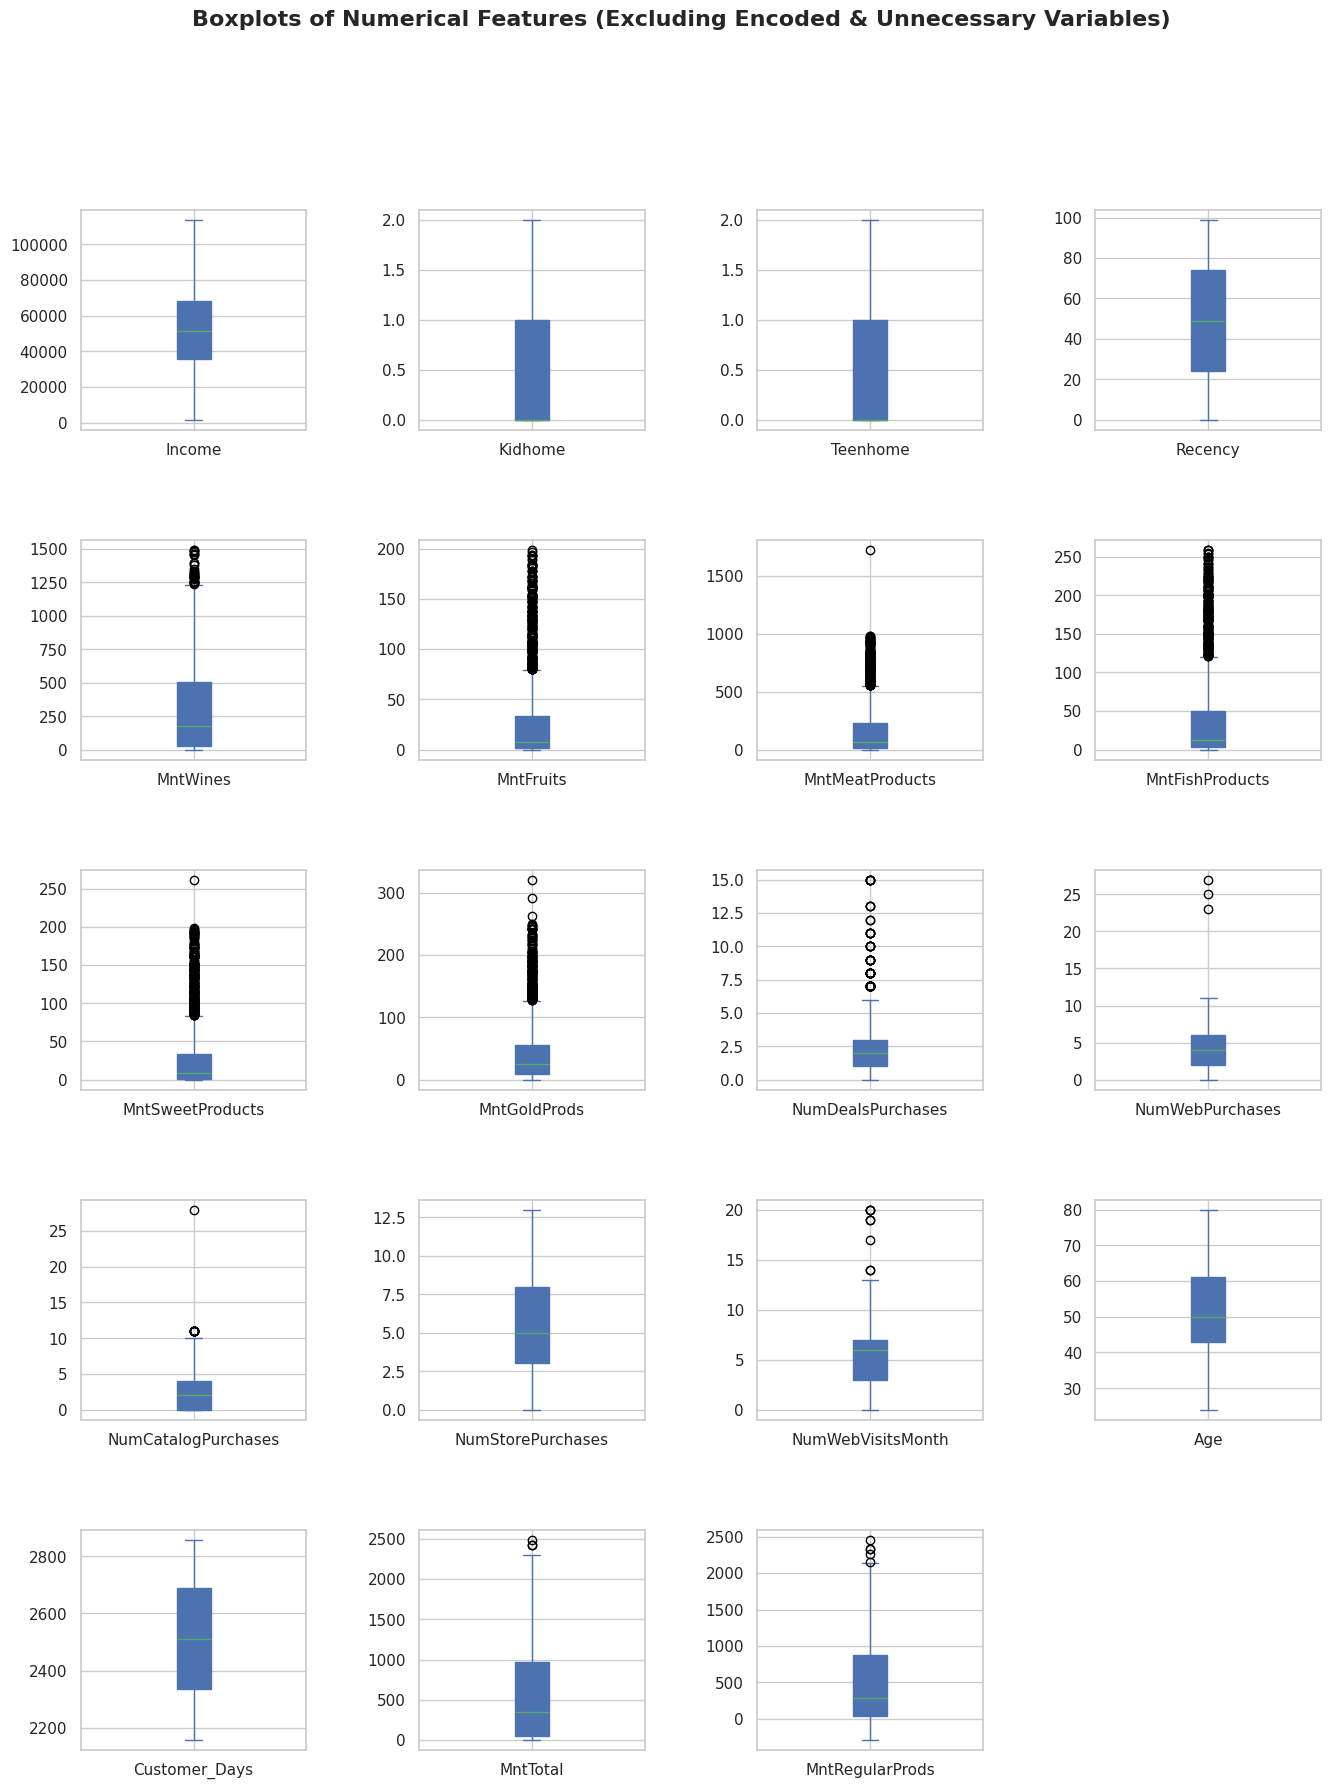

In [29]:
# Exclude categorical, campaign-related, one-hot encoded, and unnecessary columns
exclude_cols = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'Response', 'Complain', 'AcceptedCmpOverall',
    'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
    'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD',
    'Z_Revenue', 'Z_CostContact'  # Removing unnecessary columns
]

# Select only numerical columns for boxplots
df_to_plot = df.drop(columns=exclude_cols, errors='ignore').select_dtypes(include=np.number)

num_cols = len(df_to_plot.columns)
rows = (num_cols // 4) + (num_cols % 4 > 0)

# Create boxplots
df_to_plot.plot(subplots=True, layout=(rows, 4), kind='box',
                figsize=(16, rows * 4), patch_artist=True)

# Adjust spacing for better readability
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle("Boxplots of Numerical Features (Excluding Encoded & Unnecessary Variables)", fontsize=16, fontweight='bold')
plt.show()


<Figure size 1200x1000 with 0 Axes>

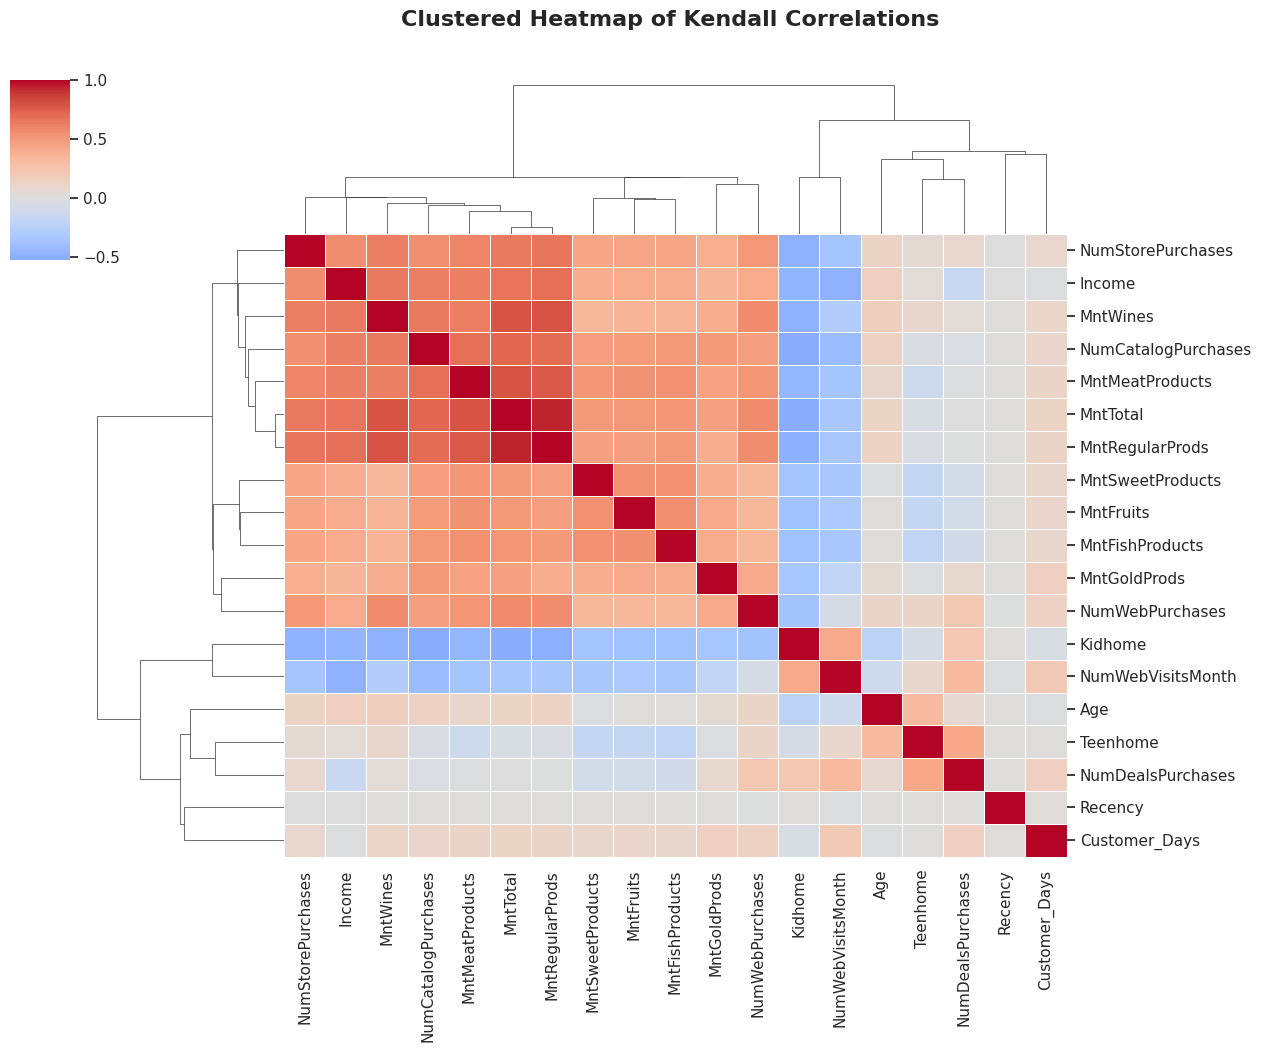

In [30]:
# Define columns to exclude (categorical, one-hot encoded, and unnecessary)
exclude_cols = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
    'AcceptedCmp5', 'Response', 'Complain', 'AcceptedCmpOverall',
    'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
    'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD',
    'Z_Revenue', 'Z_CostContact'  # Exclude unnecessary columns
]

# Compute Kendall correlation matrix
corrs = df.drop(columns=exclude_cols, errors='ignore').select_dtypes(include=np.number).corr(method='kendall')

# Create the clustermap
plt.figure(figsize=(12, 10))
sns.clustermap(corrs, cmap='coolwarm', center=0, cbar_kws={"shrink": 0.8},
               linewidths=0.5, annot=False, fmt=".2f", figsize=(12, 10),
               cbar_pos=(-0.05, 0.8, 0.05, 0.18))
plt.suptitle("Clustered Heatmap of Kendall Correlations", fontsize=16, fontweight='bold', y=1.05)
plt.show()


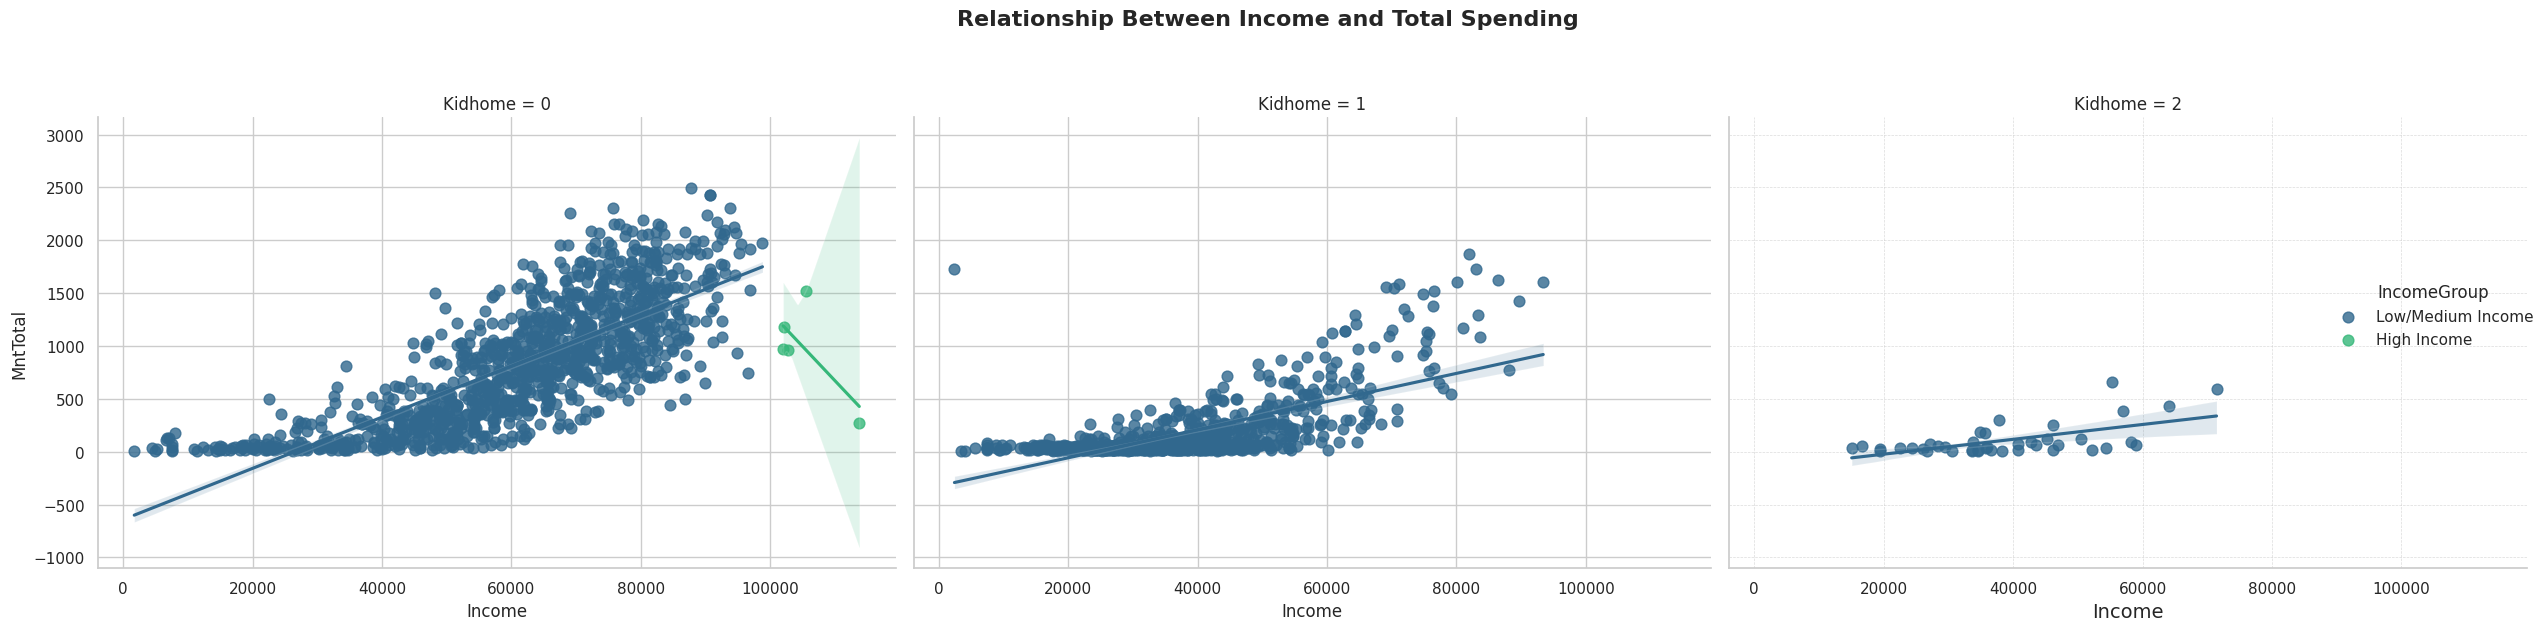

In [31]:
# Segmenting data into High Income and Others
df['IncomeGroup'] = ['High Income' if x >= 100000 else 'Low/Medium Income' for x in df['Income']]

# Plot
sns.lmplot(
    x='Income',
    y='MntTotal',
    data=df[df['Income'] < 200000],
    hue='IncomeGroup',
    col='Kidhome',
    palette='viridis',
    height=6,
    aspect=1.3,
    scatter_kws={'s': 60, 'alpha': 0.8}
)

plt.suptitle('Relationship Between Income and Total Spending', y=1.05, fontsize=16, fontweight='bold')
plt.xlabel('Income', fontsize=14)
plt.ylabel('Total Spending (MntTotal)', fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)  # Adding gridlines
plt.tight_layout()
plt.show()


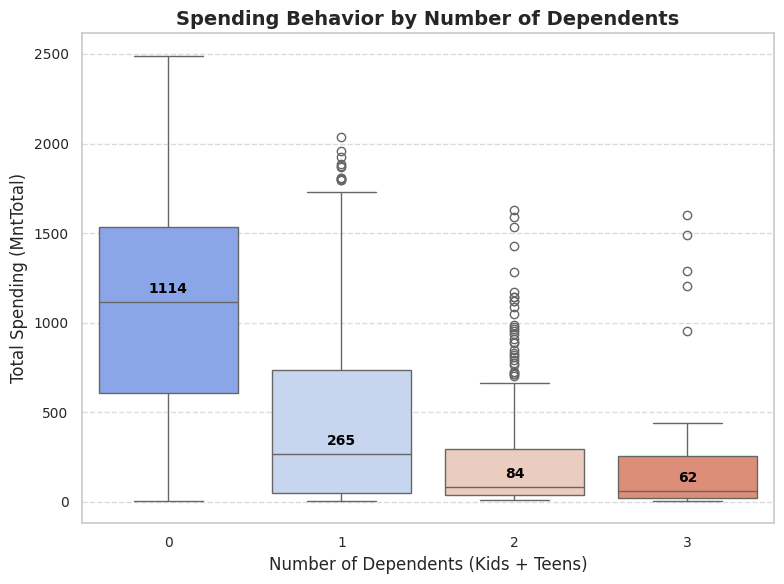

In [32]:
# Create a new column for dependents
df['Dependents'] = df['Kidhome'] + df['Teenhome']

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Dependents',
    y='MntTotal',
    data=df,
    palette="coolwarm",
    showfliers=True
)
plt.title("Spending Behavior by Number of Dependents", fontsize=14, weight='bold')
plt.xlabel("Number of Dependents (Kids + Teens)", fontsize=12)
plt.ylabel("Total Spending (MntTotal)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate median values on each box
medians = df.groupby("Dependents")["MntTotal"].median()
for i, median in enumerate(medians):
    plt.text(
        i,
        median + 50,
        f"{median:.0f}",
        ha="center",
        color="black",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


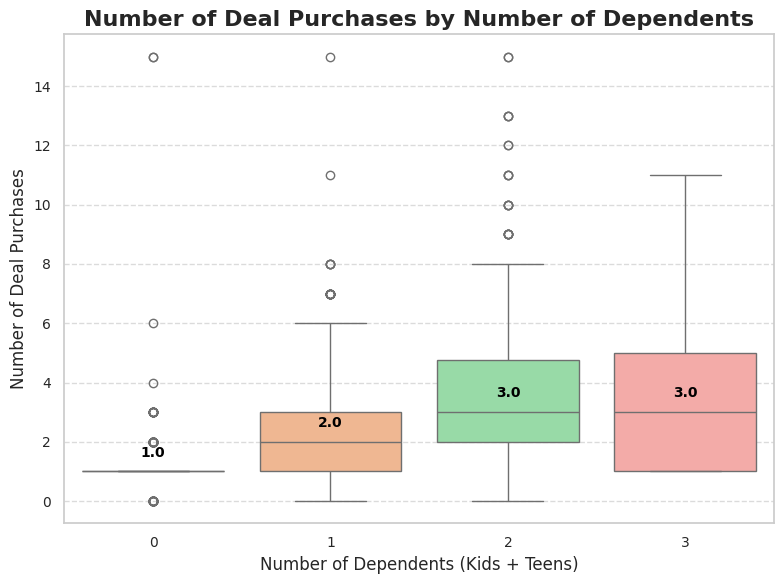

In [33]:
# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Dependents',
    y='NumDealsPurchases',
    data=df,
    palette='pastel',
    showfliers=True
)

plt.title('Number of Deal Purchases by Number of Dependents', fontsize=16, fontweight='bold')
plt.xlabel('Number of Dependents (Kids + Teens)', fontsize=12)
plt.ylabel('Number of Deal Purchases', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Compute median values
medians = df.groupby("Dependents")["NumDealsPurchases"].median()

# Annotate median values
for i, median in enumerate(medians):
    plt.text(
        i,
        median + 0.5,
        f"{median:.1f}",
        ha="center",
        color="black",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


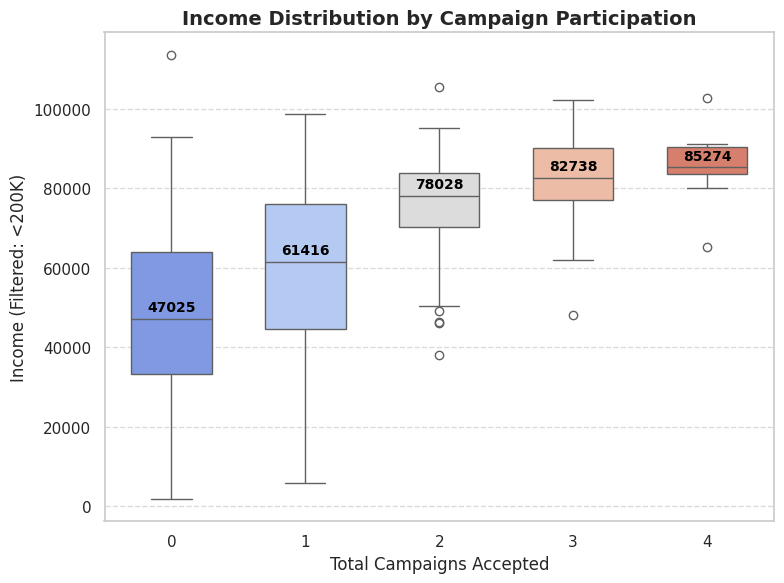

In [34]:
# Create TotalCampaignsAcc
df['TotalCampaignsAcc'] = (
    df['AcceptedCmp1'] +
    df['AcceptedCmp2'] +
    df['AcceptedCmp3'] +
    df['AcceptedCmp4'] +
    df['AcceptedCmp5']
)

# Filter dataset for income < 200000
df_filtered = df[df['Income'] < 200000]

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='TotalCampaignsAcc',
    y='Income',
    data=df_filtered,
    palette="coolwarm",
    width=0.6,
    showfliers=True
)

plt.title('Income Distribution by Campaign Participation', fontsize=14, fontweight='bold')
plt.xlabel('Total Campaigns Accepted', fontsize=12)
plt.ylabel('Income (Filtered: <200K)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Compute median values for each category of 'TotalCampaignsAcc'
medians = df_filtered.groupby("TotalCampaignsAcc")["Income"].median()

# Annotate median values above each box
for i, median in enumerate(medians):
    plt.text(
        i,
        median + 2000,
        f"{median:.0f}",
        ha="center",
        color="black",
        fontsize=10,
        fontweight="bold"
    )

plt.tight_layout()
plt.show()


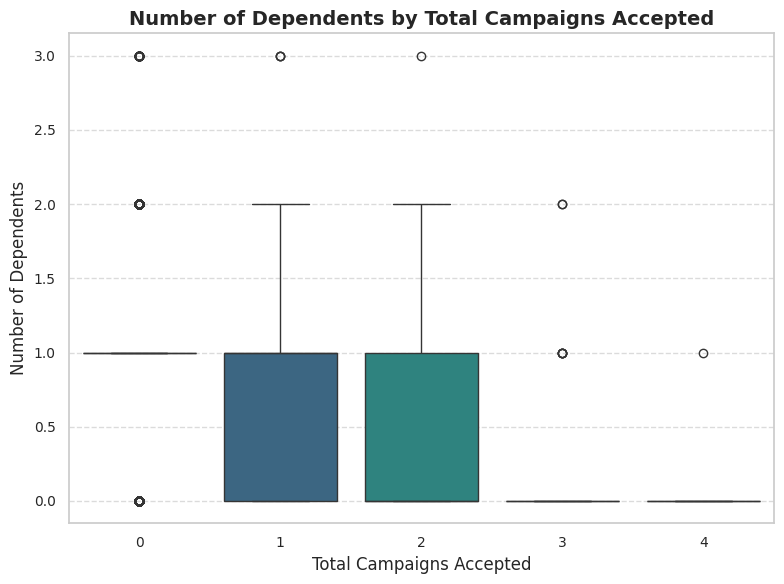

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(
    x='TotalCampaignsAcc',
    y='Dependents',
    data=df,
    palette='viridis'
)


plt.title('Number of Dependents by Total Campaigns Accepted', fontsize=14, fontweight='bold')
plt.xlabel('Total Campaigns Accepted', fontsize=12)
plt.ylabel('Number of Dependents', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)


plt.tight_layout()
plt.show()

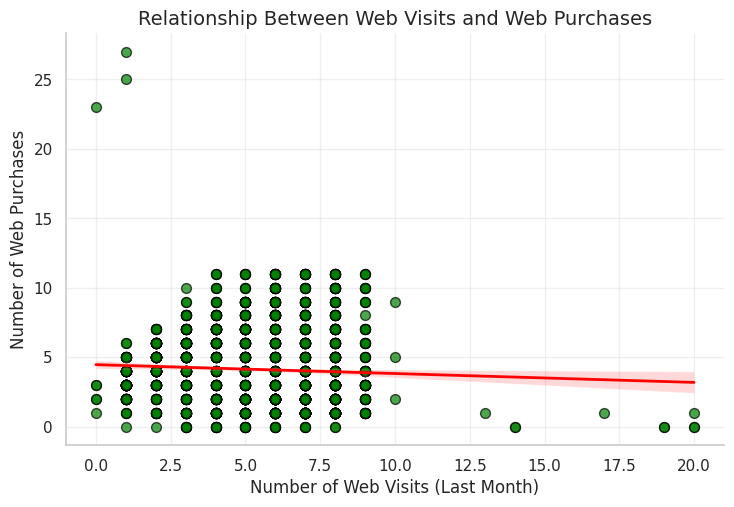

In [36]:
sns.lmplot(
    x='NumWebVisitsMonth',
    y='NumWebPurchases',
    data=df,
    height=5,
    aspect=1.5,
    scatter_kws={'alpha': 0.7, 's': 50, 'color': 'green','edgecolor': 'black'},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.xlabel("Number of Web Visits (Last Month)", fontsize=12)
plt.ylabel("Number of Web Purchases", fontsize=12)
plt.title("Relationship Between Web Visits and Web Purchases", fontsize=14)
plt.grid(alpha=0.3)
plt.show()


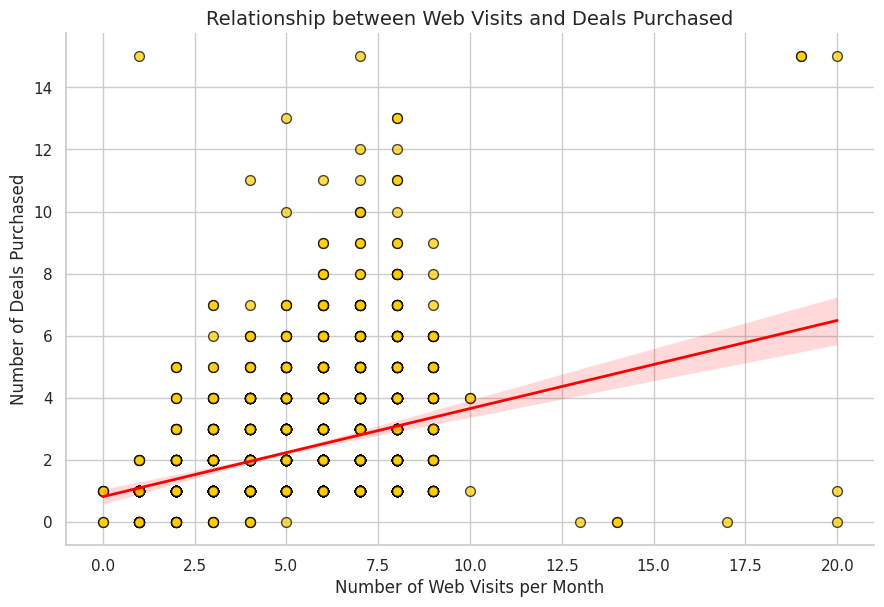

In [37]:
sns.set(style="whitegrid")

sns.lmplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df,
           aspect=1.5,
           scatter_kws={'s': 50, 'alpha': 0.7, 'color': '#FFCC00','edgecolor': 'black'},
           line_kws={'color': 'red', 'lw': 2},
           height=6)

plt.xlabel('Number of Web Visits per Month', fontsize=12)
plt.ylabel('Number of Deals Purchased', fontsize=12)
plt.title('Relationship between Web Visits and Deals Purchased', fontsize=14)

plt.show()


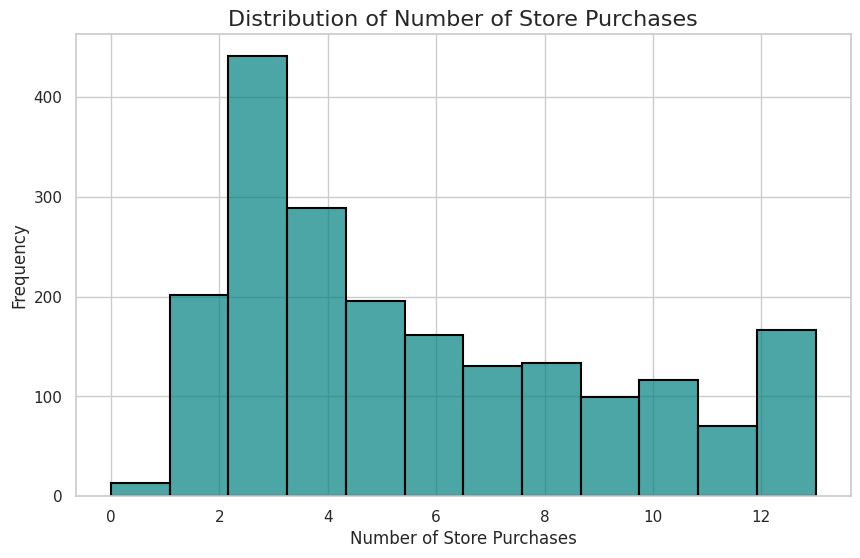

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['NumStorePurchases'], kde=False, bins=12, color='teal',
             edgecolor='black', linewidth=1.5, alpha=0.7)

plt.title('Distribution of Number of Store Purchases', size=16)
plt.xlabel('Number of Store Purchases', size=12)
plt.ylabel('Frequency', size=12)

plt.show()


In [39]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

Linear regression model RMSE: 2.1036
R-squared value: 0.5821
Median value of target variable: 5.0


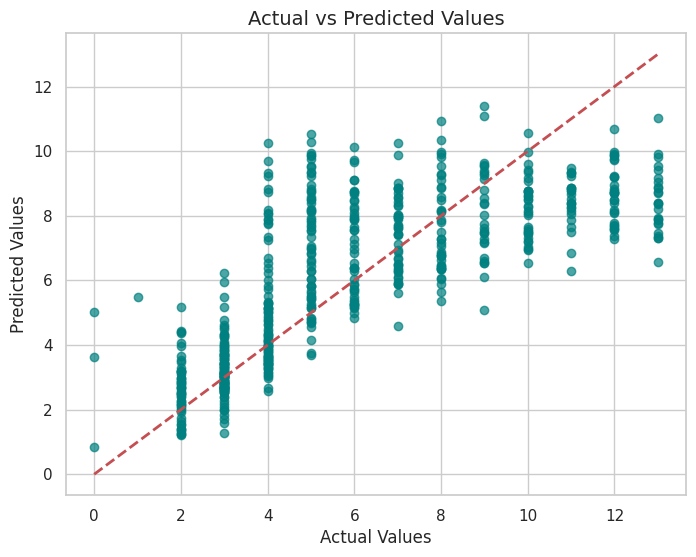

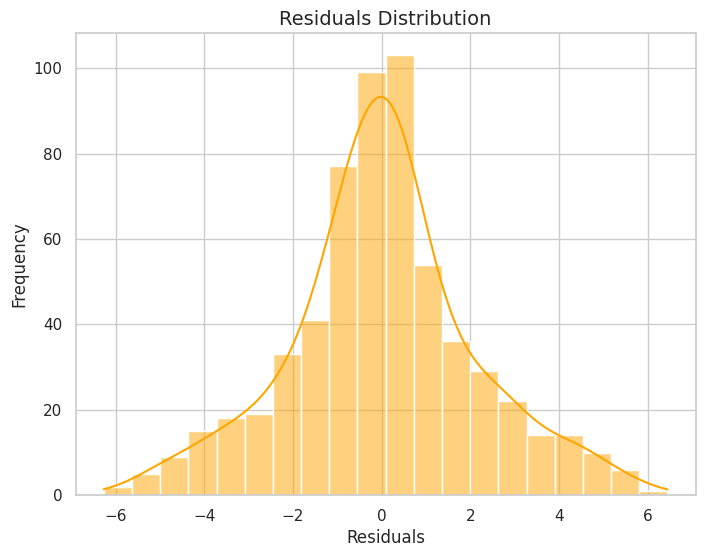

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Isolate X and y variables
X = df_encoded.drop(columns='NumStorePurchases')
y = df_encoded['NumStorePurchases']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predictions
preds = model.predict(X_test_scaled)

# Evaluate model
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)
print(f"Linear regression model RMSE: {rmse:.4f}")
print(f"R-squared value: {r2:.4f}")
print(f"Median value of target variable: {y.median()}")

# Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, preds, color='teal', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14)
plt.grid(True)
plt.show()

# Analyzing residuals
residuals = y_test - preds
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color='orange', bins=20)
plt.title("Residuals Distribution", fontsize=14)
plt.xlabel("Residuals", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(True)
plt.show()


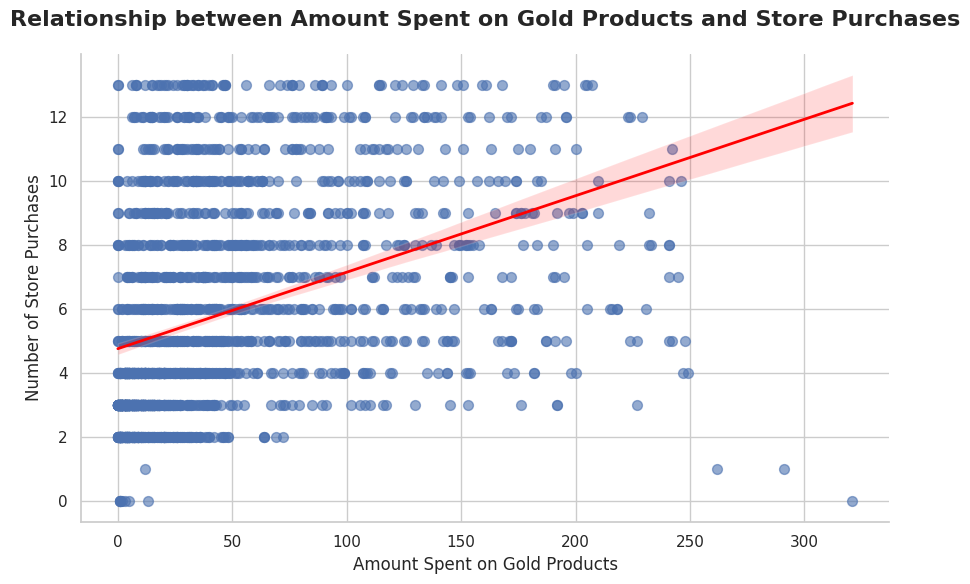

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data=df,
           aspect=1.5, height=6, scatter_kws={'s': 50, 'alpha': 0.6}, line_kws={'color': 'red', 'lw': 2})

plt.title('Relationship between Amount Spent on Gold Products and Store Purchases', size=16, weight='bold', pad=20)
plt.xlabel('Amount Spent on Gold Products', size=12)
plt.ylabel('Number of Store Purchases', size=12)

plt.tight_layout()
plt.show()


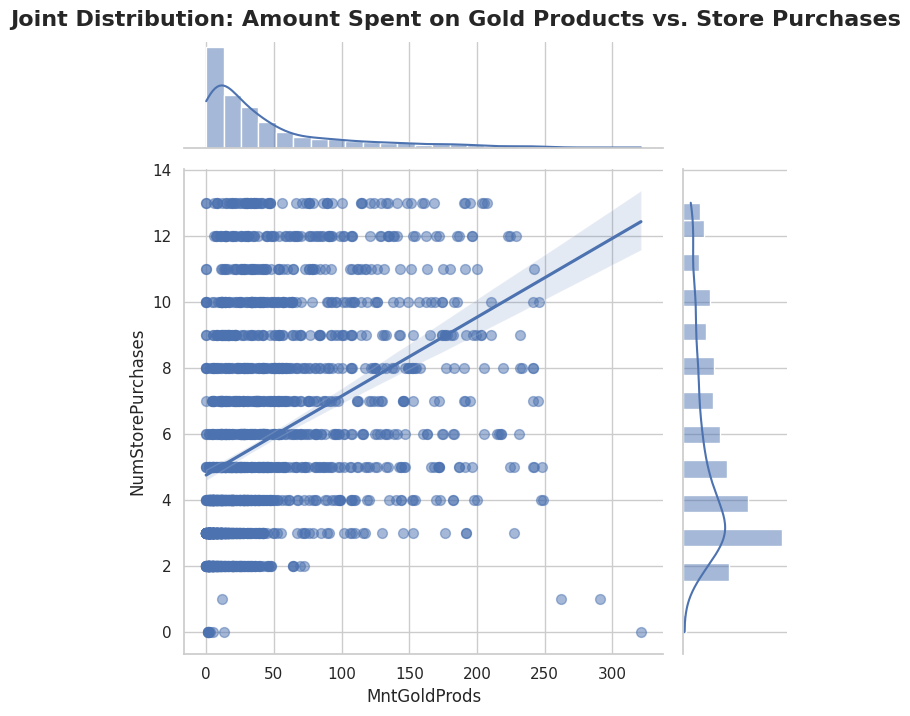

In [42]:
sns.jointplot(x='MntGoldProds', y='NumStorePurchases', data=df, kind='reg',
              height=7, ratio=4, marginal_kws={'bins': 25, 'fill': True},
              scatter_kws={'alpha': 0.5, 's': 50})

plt.suptitle('Joint Distribution: Amount Spent on Gold Products vs. Store Purchases',
             size=16, weight='bold', y=1.02)

plt.show()


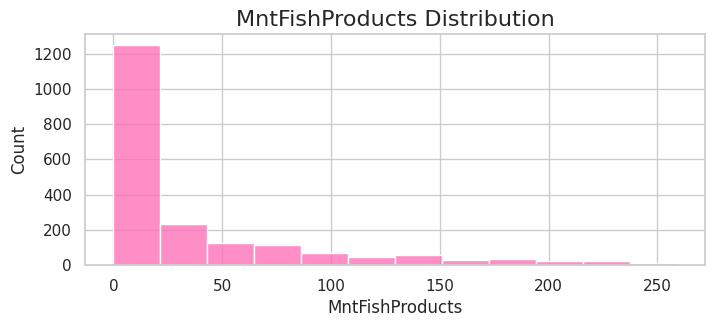

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 3))
sns.histplot(df['MntFishProducts'], kde=False, bins=12, color='hotpink')
plt.title('MntFishProducts Distribution', size=16)
plt.ylabel('Count')
plt.xlabel('MntFishProducts')
plt.grid(True)
plt.show()
